<a href="https://colab.research.google.com/github/Anurag-sid/stock-price-prediction-using-ml/blob/main/t_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)

In [3]:
dates = pd.date_range(start="2010-01-01", periods=1000, freq="B")

In [4]:
prices = np.cumsum(np.random.randn(1000) * 2 + 0.05) + 100

In [5]:
df = pd.DataFrame({"Date": dates, "Stock Price": prices})

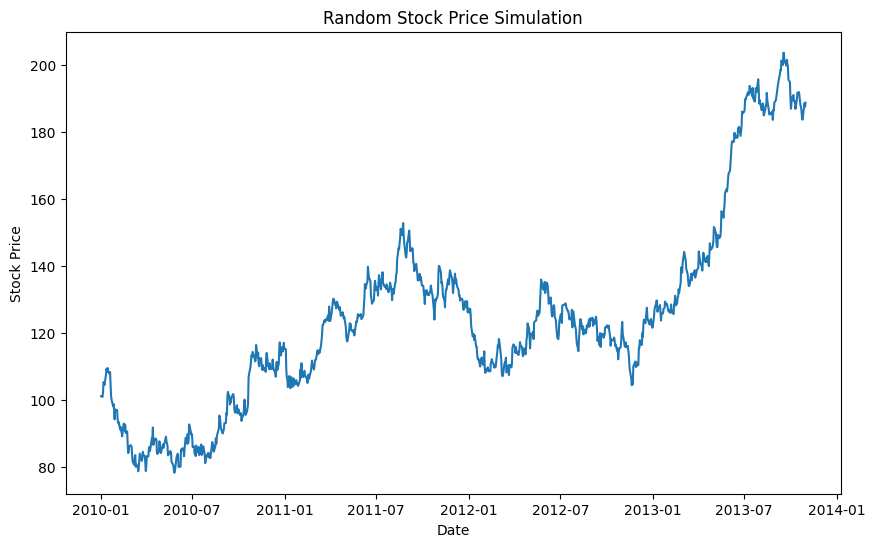

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Stock Price"])
plt.title("Random Stock Price Simulation")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [7]:
df['Prev Close'] = df['Stock Price'].shift(1)
df.dropna(inplace=True)

In [8]:
X = df[['Prev Close']]
y = df['Stock Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.98081403170116


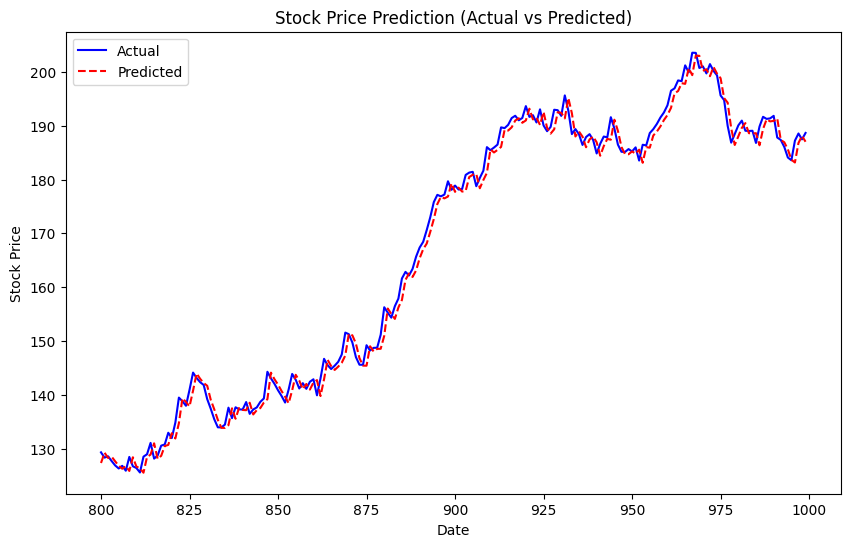

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("Stock Price Prediction (Actual vs Predicted)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()